In [1]:
def get_thumbnail(path):
    if path == None:
         return 
    i = Image.open(path)
    i.thumbnail((800, 800), Image.LANCZOS)
    i = i.rotate(90, expand=True)
    return i

def get_thumb_nail_tif(tif_image):
    if tif_image == None:
        return
    im_array = np.asarray(tif_image)
    im_array = im_array * (255.0/im_array.max())
    img = Image.fromarray(im_array)
    img = img.convert("RGB")
    img.thumbnail((800, 800), Image.LANCZOS)
    img = img.rotate(90, expand=True)
    return img

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return '<img src="data:image/jpeg;base64,{}">'.format(image_base64(im))

In [2]:
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import HTML
from io import BytesIO
import base64
from data_180218 import load_data


In [3]:
collections = load_data()

In [4]:
images =pd.DataFrame(columns=["Collection","Before 600 80 635","After 600 80 635"])
for i, (c_name, c_data) in enumerate(collections.items()):
    tiffs_a = c_data.tifs_a
    tiffs_b = c_data.tifs_b

    #thumb_a = get_thumb_nail_tif(c_data.tifs_a[1])
    #thumb_b = get_thumb_nail_tif(c_data.tifs_b[1])
    thumb_a = get_thumbnail(c_data.grid_a_path)
    thumb_b = get_thumbnail(c_data.grid_b_path)
    images.loc[i] = c_name,thumb_b,thumb_a

,Collection,Before 600 80 635,After 600 80 635
0,slide_19,None,None
7,slide_20,None,None
8,slide_21,,
9,slide_22,,
10,slide_23,,
3,slide_24,,
4,slide_25,,
5,slide_26,,
6,slide_27,,
1,slide_28,,

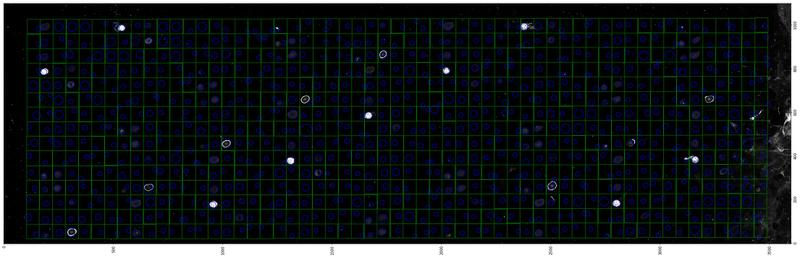
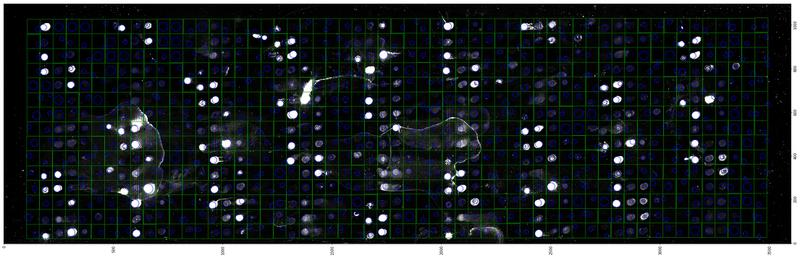
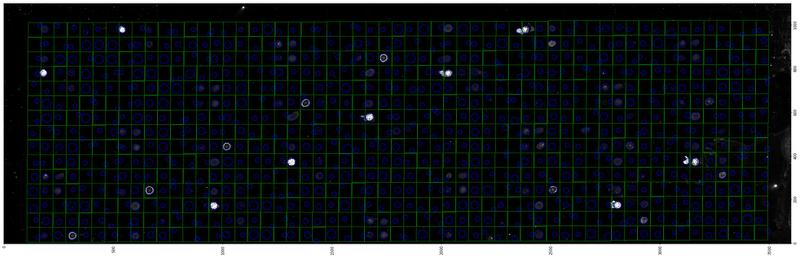
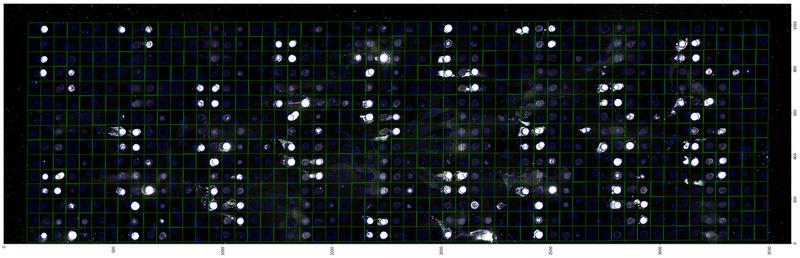
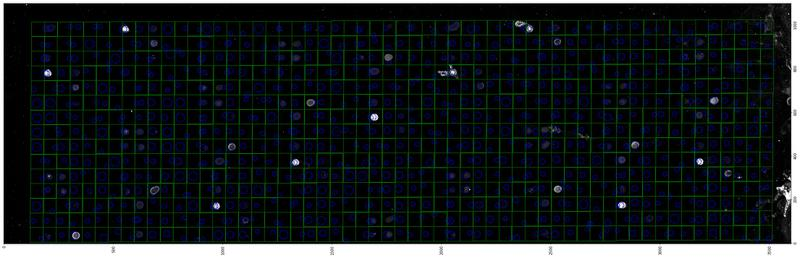
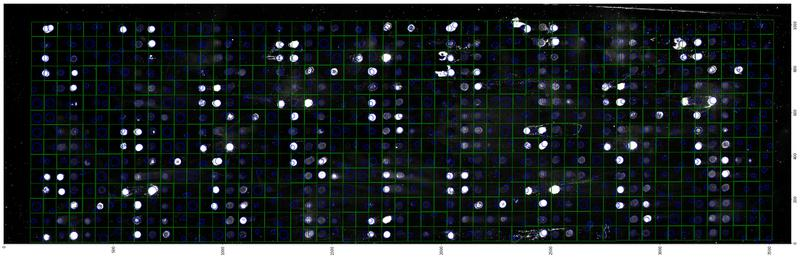
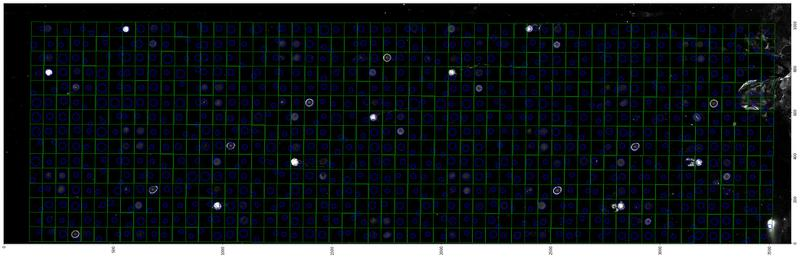
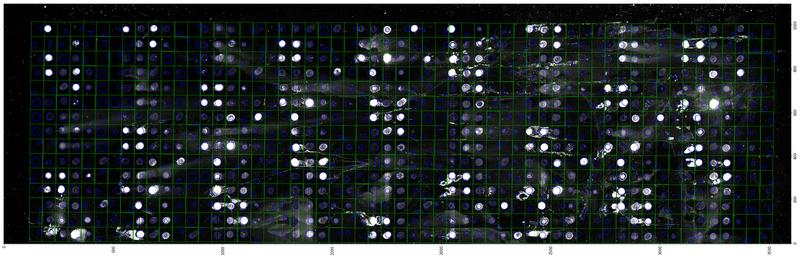
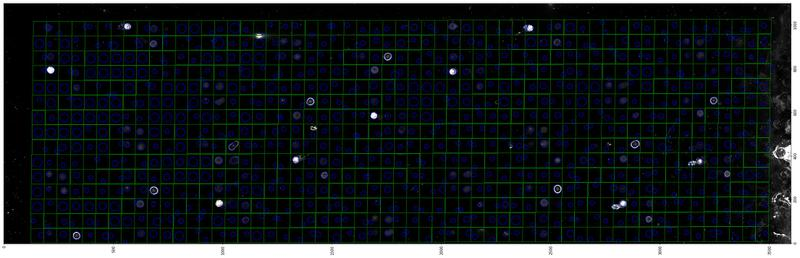
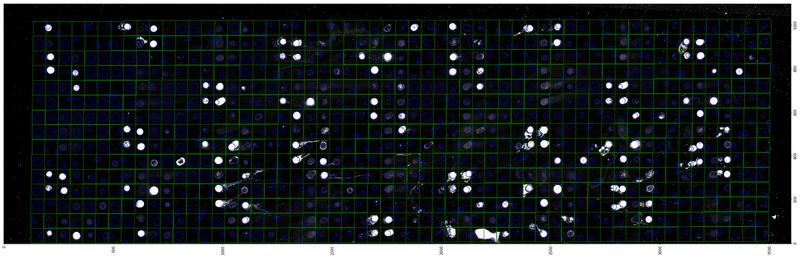
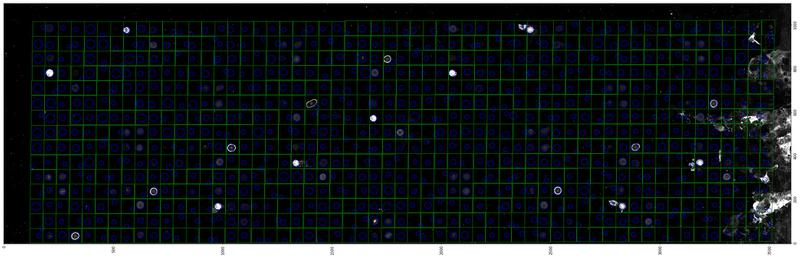
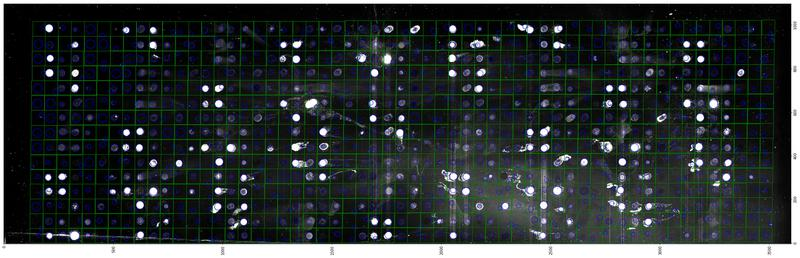
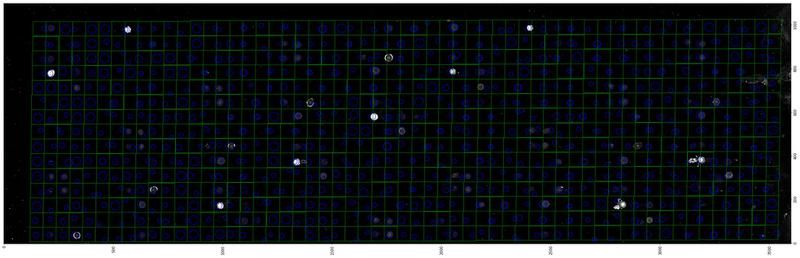
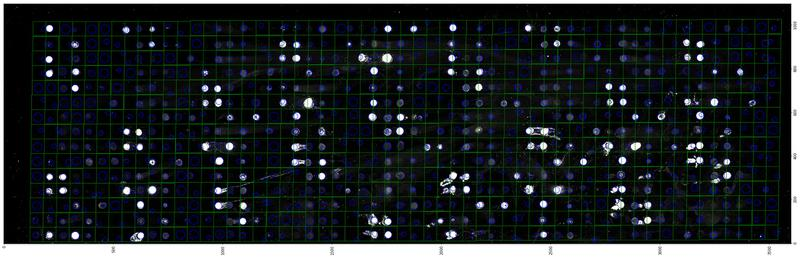
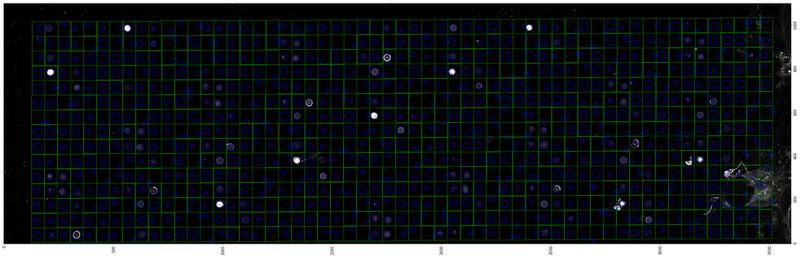
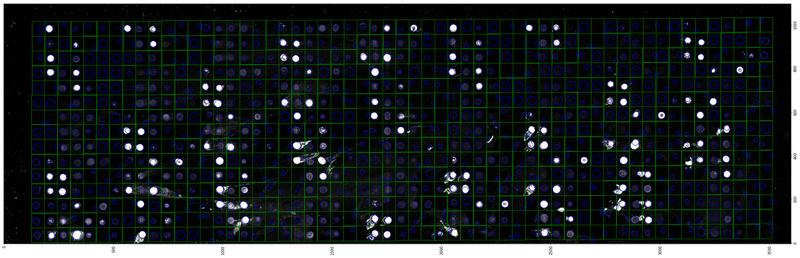
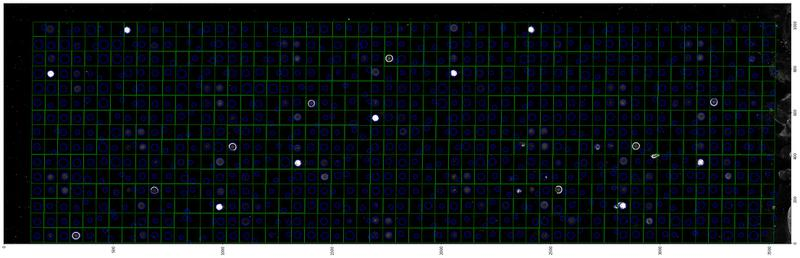
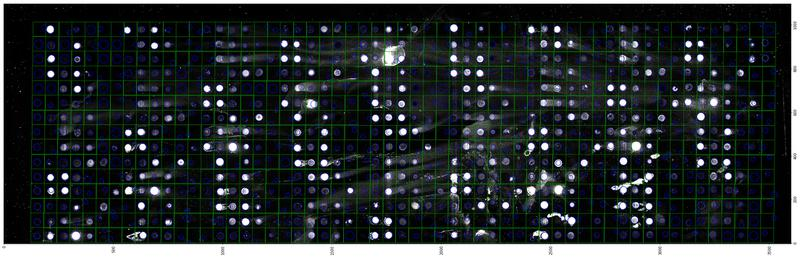
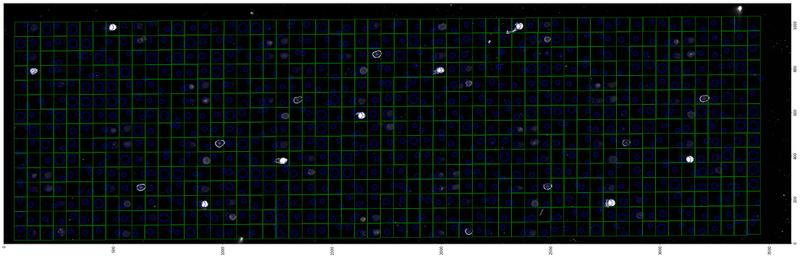
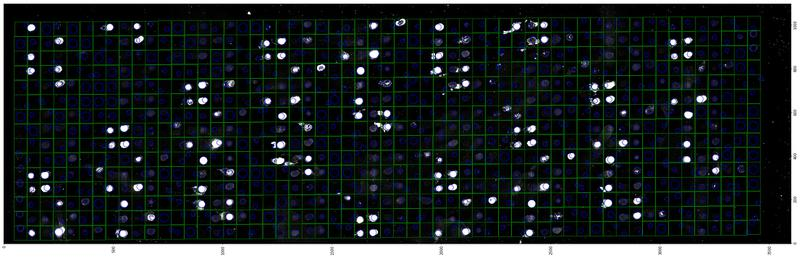
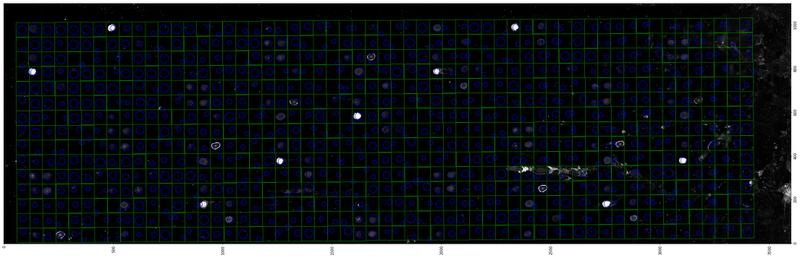
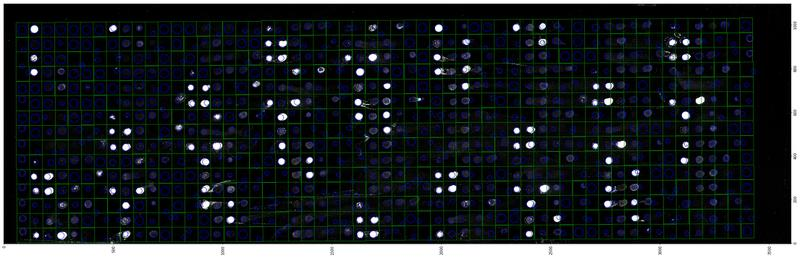
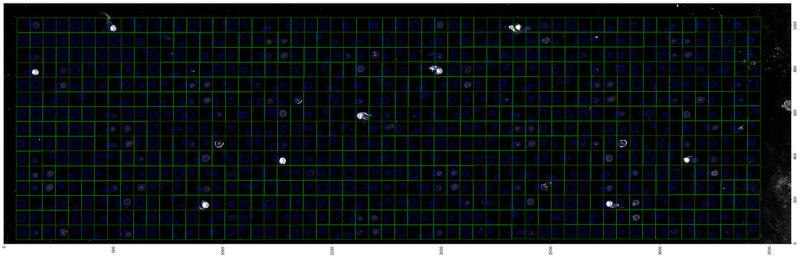
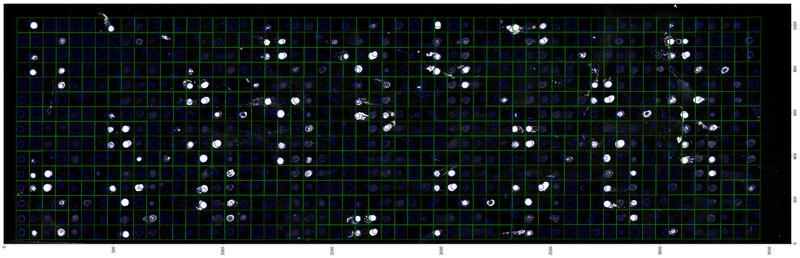
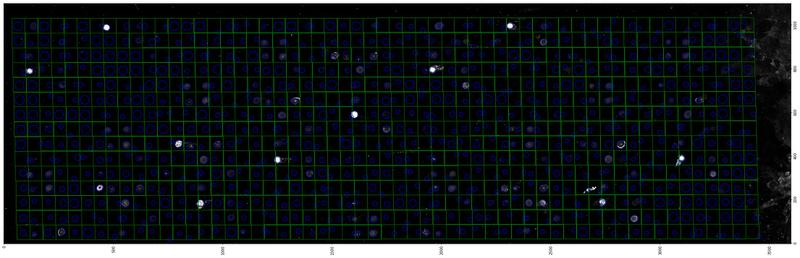
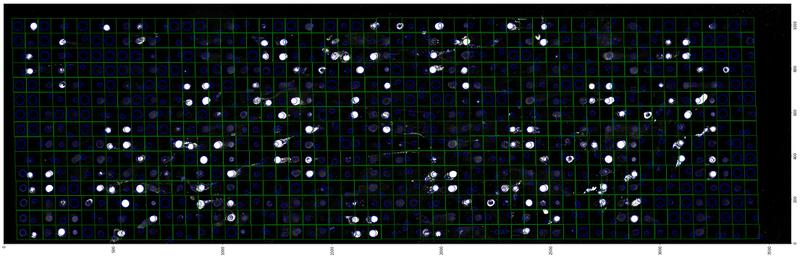
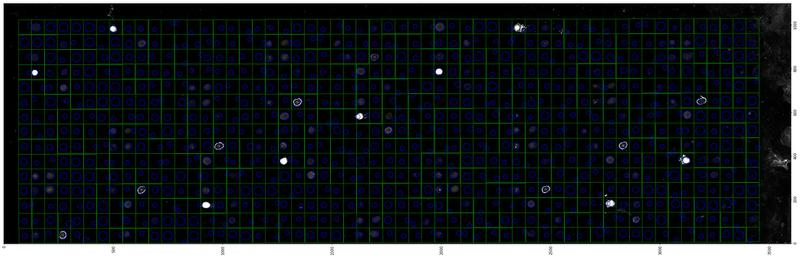
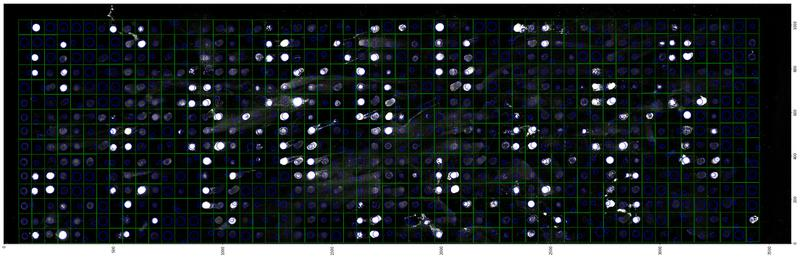
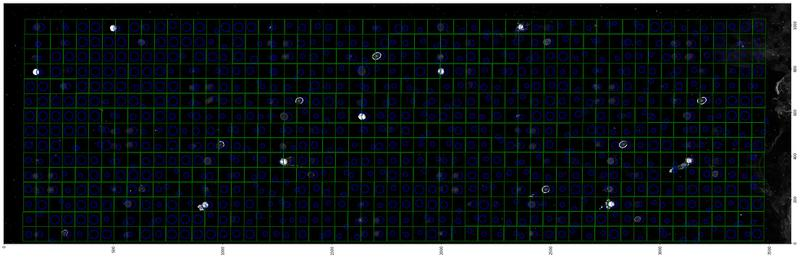
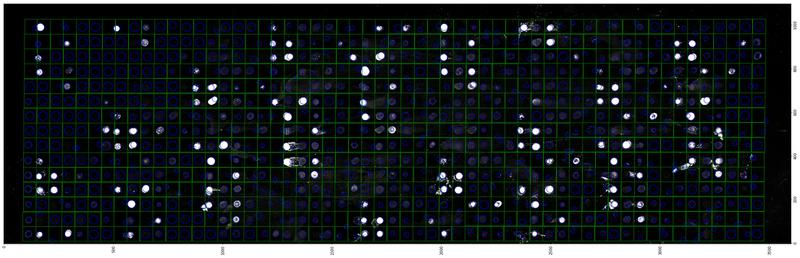
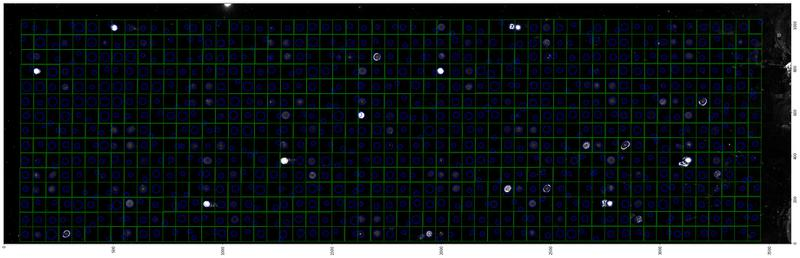
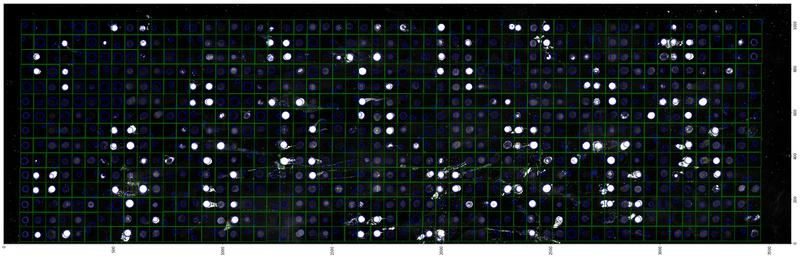
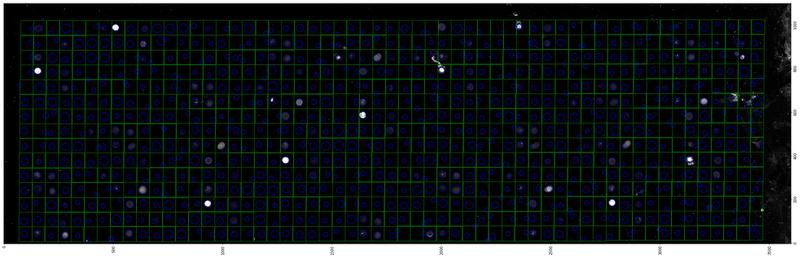
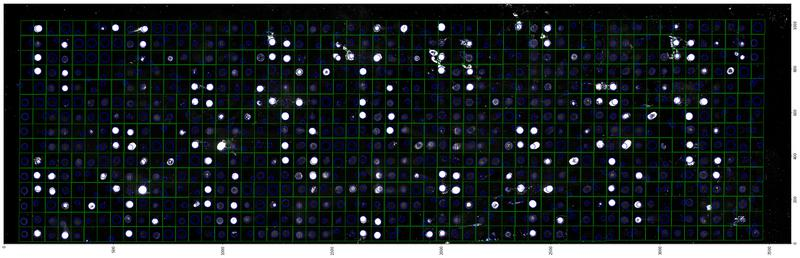
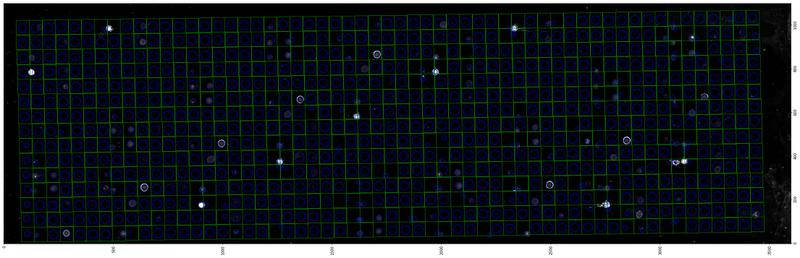
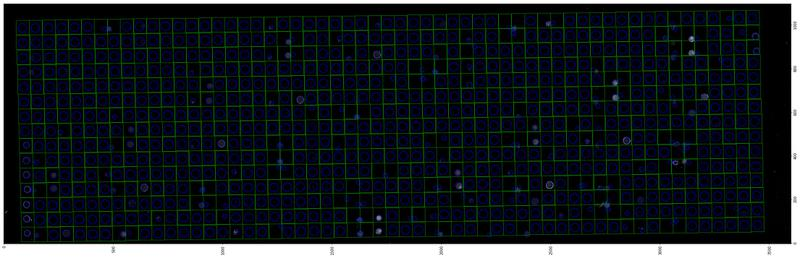
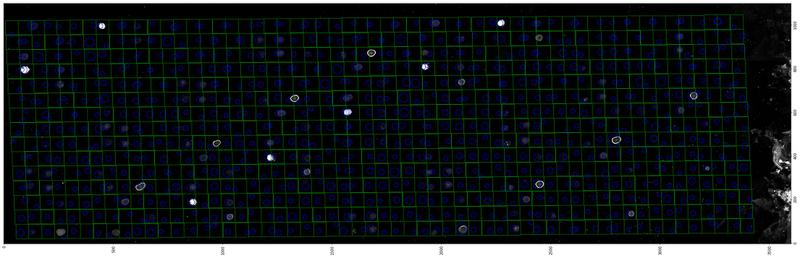
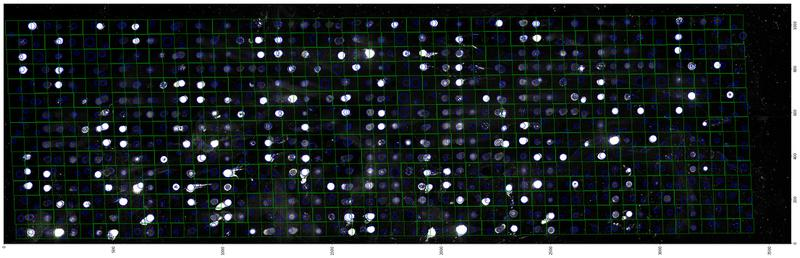
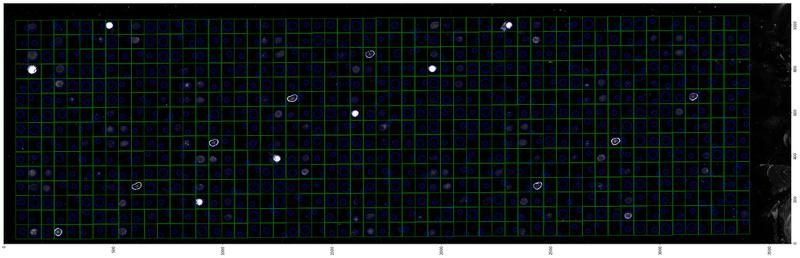
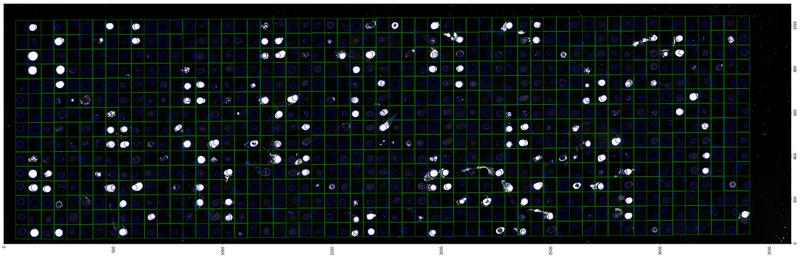
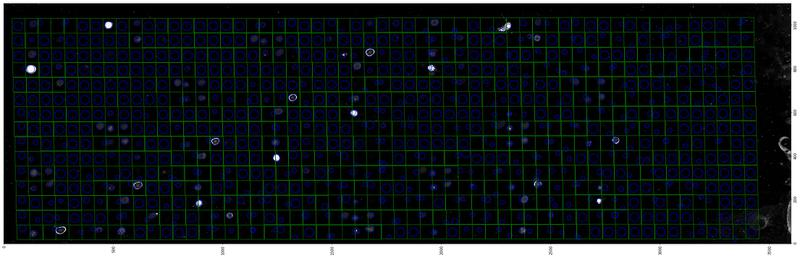
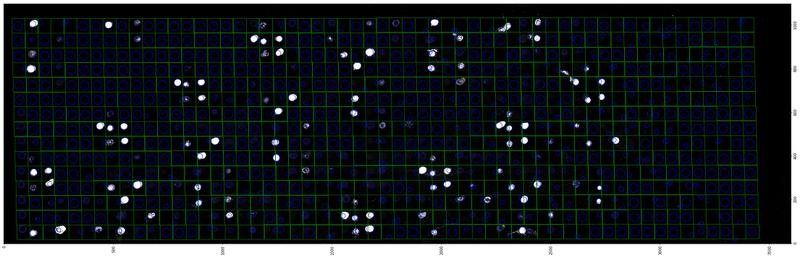
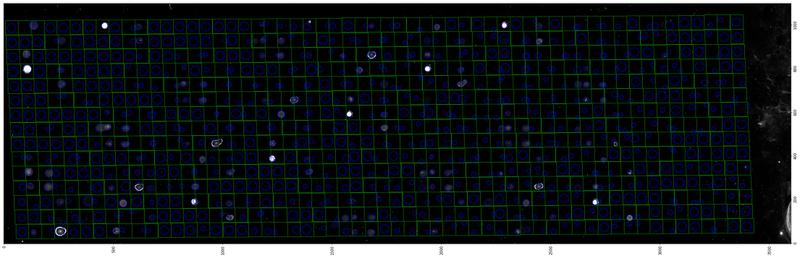
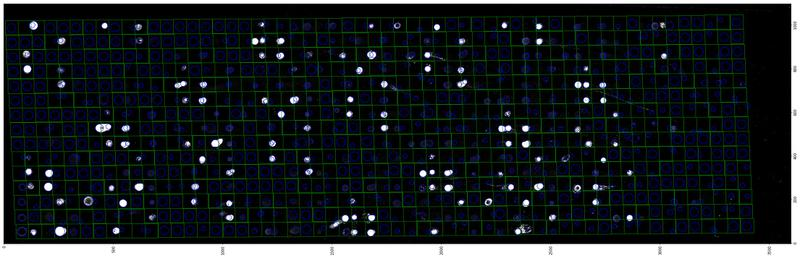
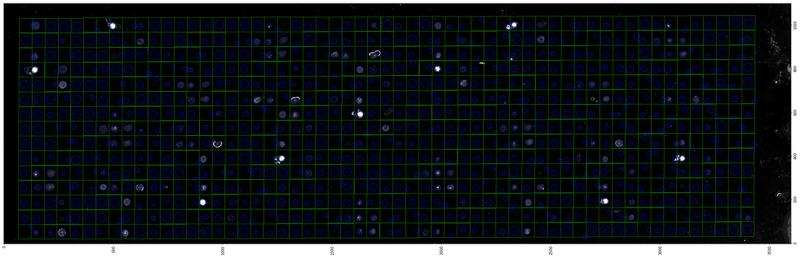
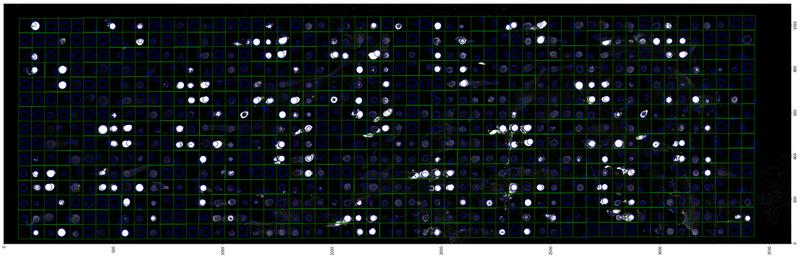
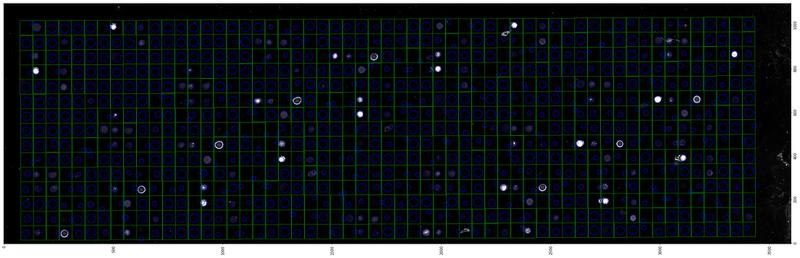
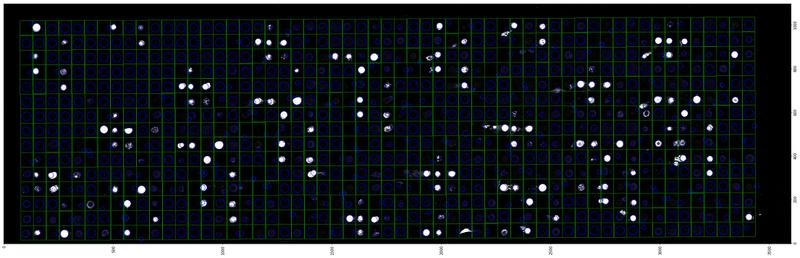

In [5]:
pd.set_option('display.max_colwidth', -1)
img_cols = list(images.columns)[1:]
formatters = {key:image_formatter for key in img_cols}
images = images.sort_values(by="Collection")
HTML(images.to_html(formatters=formatters, escape=False))

